In [25]:
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [10]:
data =pd.read_pickle('data_feature_engineering.pkl')

In [11]:
data

,Product_ID,Sales_Agent,Delivery_Mode,Status,Month,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Howrah,Location_Hyderabad,...,Location_Other Locations,Location_Pune,Location_Trivandrum,Source_Call,Source_Campaign,Source_Customer Referral,Source_Existing Customer,Source_Live Chat,Source_Other,Source_Website
0,0.615385,1,0,0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.615385,10,0,0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0.615385,10,0,0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.615385,10,0,0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.615385,10,0,0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,0.269231,8,3,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7418,0.500000,7,0,0,0.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
7419,0.115385,1,1,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7420,0.730769,0,1,0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


### Splitting the data

In [12]:
X = data.drop('Status', axis=1)
y = data['Status']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression 

In [13]:
# Initialize the KNeighborsClassifier
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(x_train, y_train)

# Make predictions
y_pred = logistic_regression.predict(x_test)

# Evaluate the model
print("logistic regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

logistic regression
Accuracy: 0.701707097933513

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77      1422
           1       0.60      0.54      0.56       804

    accuracy                           0.70      2226
   macro avg       0.67      0.67      0.67      2226
weighted avg       0.70      0.70      0.70      2226


Confusion Matrix:
 [[1131  291]
 [ 373  431]]


### KNN

In [14]:
# Initialize the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(x_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(x_test)

# Evaluate the model
print("K-Nearest Neighbors (KNN)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors (KNN)
Accuracy: 0.6805929919137467

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1422
           1       0.56      0.56      0.56       804

    accuracy                           0.68      2226
   macro avg       0.65      0.65      0.65      2226
weighted avg       0.68      0.68      0.68      2226


Confusion Matrix:
 [[1066  356]
 [ 355  449]]


### Naive Bayes

In [15]:
# Initialize the GaussianNB model
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(x_train, y_train)

# Make predictions
y_pred_nb = nb_classifier.predict(x_test)

# Evaluate the model
print("Naive Bayes (GaussianNB)")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes (GaussianNB)
Accuracy: 0.6671159029649596

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.93      0.78      1422
           1       0.62      0.20      0.31       804

    accuracy                           0.67      2226
   macro avg       0.65      0.57      0.54      2226
weighted avg       0.65      0.67      0.61      2226


Confusion Matrix:
 [[1321  101]
 [ 640  164]]


### SVC

In [16]:
# Initialize the SVC model
svc_model = SVC(probability =True)
svc_model.fit(x_train, y_train)

# Make predictions
y_pred = svc_model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6918238993710691

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77      1422
           1       0.59      0.47      0.53       804

    accuracy                           0.69      2226
   macro avg       0.66      0.64      0.65      2226
weighted avg       0.68      0.69      0.68      2226



### Decision Tree

In [17]:
# Initialize the DecisionTreeClassifier model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(x_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(x_test)

# Evaluate the model
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier
Accuracy: 0.6761006289308176

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.75      1422
           1       0.55      0.54      0.55       804

    accuracy                           0.68      2226
   macro avg       0.65      0.65      0.65      2226
weighted avg       0.67      0.68      0.68      2226


Confusion Matrix:
 [[1068  354]
 [ 367  437]]


### Random Forest 

In [18]:
# Initialize the RandomForestClassifier model
rf_classifier = RandomForestClassifier()

#Train the model
rf_classifier.fit(x_train, y_train)

# Make Predictions
y_pred = rf_classifier.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6873315363881402

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      1422
           1       0.57      0.57      0.57       804

    accuracy                           0.69      2226
   macro avg       0.66      0.66      0.66      2226
weighted avg       0.69      0.69      0.69      2226


Confusion Matrix:
 [[1072  350]
 [ 346  458]]


### Gradient Boosting

In [19]:
# Initialize the GradientBoostingClassifier model
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(x_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(x_test)

# Evaluate the model
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Classifier
Accuracy: 0.7331536388140162

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80      1422
           1       0.65      0.55      0.60       804

    accuracy                           0.73      2226
   macro avg       0.71      0.69      0.70      2226
weighted avg       0.73      0.73      0.73      2226


Confusion Matrix:
 [[1188  234]
 [ 360  444]]


### XGboost

In [20]:
# Initialize the XGBClassifier model
xgb = XGBClassifier(random_state=42)

# Train the model
xgb.fit(x_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(x_test)

# Evaluate the model
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Gradient Boosting Classifier
Accuracy: 0.7151841868823001

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1422
           1       0.61      0.60      0.61       804

    accuracy                           0.72      2226
   macro avg       0.69      0.69      0.69      2226
weighted avg       0.72      0.72      0.72      2226


Confusion Matrix:
 [[1106  316]
 [ 318  486]]


### Results

### Out of all the following classification algorithm Gradient boosting is giving highest accuracy of 73%

In [21]:
# Initialize the GradientBoostingClassifier model
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(x_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(x_test)

# Evaluate the model
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Classifier
Accuracy: 0.7331536388140162

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80      1422
           1       0.65      0.55      0.60       804

    accuracy                           0.73      2226
   macro avg       0.71      0.69      0.70      2226
weighted avg       0.73      0.73      0.73      2226


Confusion Matrix:
 [[1188  234]
 [ 360  444]]


In [22]:

param_grid = {
    'n_estimators': [50, 100, 150, 200],  
    'learning_rate': [0.001, 0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7, 10],  
    'min_samples_split': [2, 5, 10], 
    'subsample': [0.8, 0.9, 1.0], 
    'loss': ['log_loss', 'exponential'] 
}

gb_classifier = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb_classifier,
    param_distributions=param_grid,
    n_iter=20, 
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(x_train, y_train)
print("Best hyperparameters found: ", random_search.best_params_)
best_gb_model = random_search.best_estimator_

# Evaluate the model
y_pred = best_gb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the tuned Gradient Boosting model: ", accuracy)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters found:  {'subsample': 1.0, 'n_estimators': 150, 'min_samples_split': 2, 'max_depth': 3, 'loss': 'log_loss', 'learning_rate': 0.1}
Accuracy of the tuned Gradient Boosting model:  0.7309074573225517


### Verifying Results

In [23]:
input_columns = [
    'Product_ID', 'Sales_Agent', 'Delivery_Mode', 'Month',
    'Location_Bangalore', 'Location_Chennai', 'Location_Delhi', 'Location_Howrah',
    'Location_Hyderabad', 'Location_International', 'Location_Kolkata', 'Location_Mumbai',
    'Location_Other Locations', 'Location_Pune', 'Location_Trivandrum',
    'Source_Call', 'Source_Campaign', 'Source_Customer Referral',
    'Source_Existing Customer', 'Source_Live Chat', 'Source_Other',
    'Source_Website'
]

status_mapping = {0: "Low Potential '0'", 1: "High Potential '1'"}

print("\nEnter the following values for prediction:")
custom_input = []

for col in input_columns:
    try:
        value = input(f"Enter value for {col}: ")
        if value.isnumeric() or (value.replace('.', '', 1).isdigit() and '.' in value):
            value = float(value)
        elif value in ['0', '1']: 
            value = int(value)
        custom_input.append(value)
    except ValueError:
        print(f"Invalid input for {col}. Please enter a valid value.")
        break

custom_input = [custom_input]

try:
    
    gb_classifier.fit(x_train, y_train)  
    custom_prediction = gb_classifier.predict(custom_input)
    predicted_status = custom_prediction[0]

    readable_status = status_mapping.get(predicted_status, "Unknown")
    print(f"\nThe predicted status is: {readable_status} ")

except Exception as e:
    print(f"\nAn error occurred during prediction: {e}")



Enter the following values for prediction:


Enter value for Product_ID:  18
Enter value for Sales_Agent:  1
Enter value for Delivery_Mode:  0
Enter value for Month:  11
Enter value for Location_Bangalore:  0
Enter value for Location_Chennai:  0
Enter value for Location_Delhi:  0
Enter value for Location_Howrah:  0
Enter value for Location_Hyderabad:  0
Enter value for Location_International:  0
Enter value for Location_Kolkata:  0
Enter value for Location_Mumbai:  0
Enter value for Location_Other Locations:  1
Enter value for Location_Pune:  0
Enter value for Location_Trivandrum:  0
Enter value for Source_Call:  0
Enter value for Source_Campaign:  0
Enter value for Source_Customer Referral:  0
Enter value for Source_Existing Customer:  0
Enter value for Source_Live Chat:  0
Enter value for Source_Other:  0
Enter value for Source_Website:  1



The predicted status is: Low Potential '0' 


C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


### Overview 

Objective:
To build and evaluate machine learning models that predict lead categories (High Potential, Low Potential) 

Dataset Size: 7422 rows × 9 columns
Target Variable: Status

Data Preprocessing Steps:
Handled Missing values,
Droped Duplicates 

Basic Feature Engineering:
Extracted columns like Day, Month, Hour and Minute,
Grouped values in columns,
handled outliers

Feature Engineering:
Applied mapping,
applied OHE,
applied scaler to numerical columns 

EDA:
univariate, bivariate and correlation 

Splitting the dataset into training and testing sets
Applying different algorithm 
Fitting and predict the model
Evaluating the result
applied hyperparamter tuning



###  Model Comparison Report 

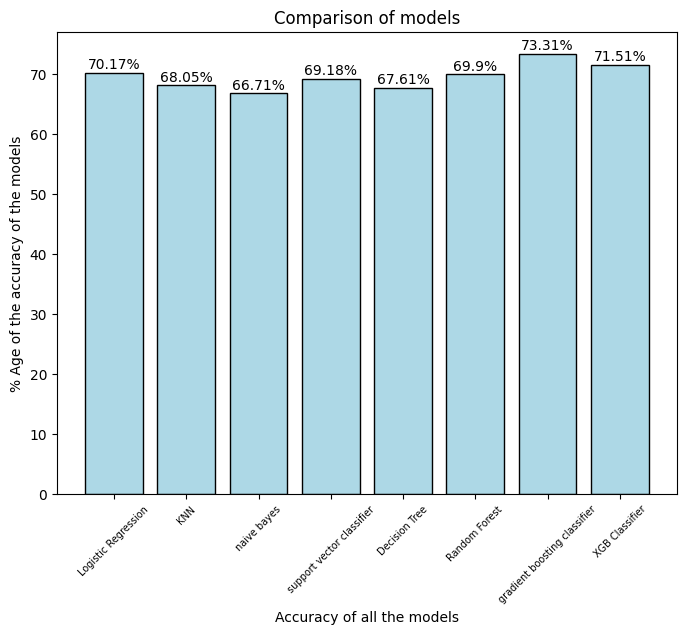

In [24]:
AllAccuracyOfTheModel = {
    'Logistic Regression' : 70.17,
    'KNN':68.05,
    'naive bayes' : 66.71,
    'support vector classifier' : 69.18,
    'Decision Tree':67.61,
    'Random Forest':69.9,    
    'gradient boosting classifier':73.31,
    'XGB Classifier' : 71.51
    
}
keys = AllAccuracyOfTheModel.keys()
values = AllAccuracyOfTheModel.values()

plt.figure(figsize=(8, 6))
bars = plt.bar(keys, values, color='lightblue', edgecolor='black')  

plt.xlabel('Accuracy of all the models')
plt.ylabel('% Age of the accuracy of the models')
plt.title('Comparison of models')
plt.xticks(rotation=45, fontsize=7)

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.2, f'{value}%', ha='center', va='bottom')

plt.show()

### Report on challenges faced 

Several columns had missing values that needed to be handled.

Grouping the values in certain columns.

Extracting features.

Handling Categorical Variables.

Hyperparameter tuning

In [26]:
data.to_pickle('data_train_predict.pkl')